# Issue
Custom aperture using the default aperture provides a different light curve than the default light curve.

The default aperture for calculation of light curve from the eleanor package is extracted and provided as custom aperture. The light curve obtained from both of them seems to be different. We here provide two examples of this situation. In the first example, Wasp-100 shows a slight variation in the flux when default and custom apertures are compared. But in the second example, the flux variation seems to be quiet large. Please have look and let me know what I am missing?

## Example 1: Wasp-100

In [1]:
from IPython.display import Image
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from matplotlib import patches
import pandas as pd

In [2]:
#Example star, wasp-100 given in the elaenor documentation
coords = SkyCoord(ra=68.959732, dec=-64.02704, unit=(u.deg, u.deg))
star = eleanor.Source(coords=coords, sector=1)

INFO: Found cached file /home/dinilbose/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file /home/dinilbose/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


Extract light curve with default aperture

Set DATE-BEG to '2018-07-25T19:31:32.353' from MJD-BEG'. [astropy.wcs.wcs]
/usr/local/lib/python3.6/dist-packages/eleanor/targetdata.py:295: UserWarning: We force our TPFs to have an odd height and width so we can properly center our apertures.
  warnings.warn('We force our TPFs to have an odd height and width so we can properly center our apertures.')
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/f

/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

Text(0.5, 1.0, 'Light curve obtained with default aperture')

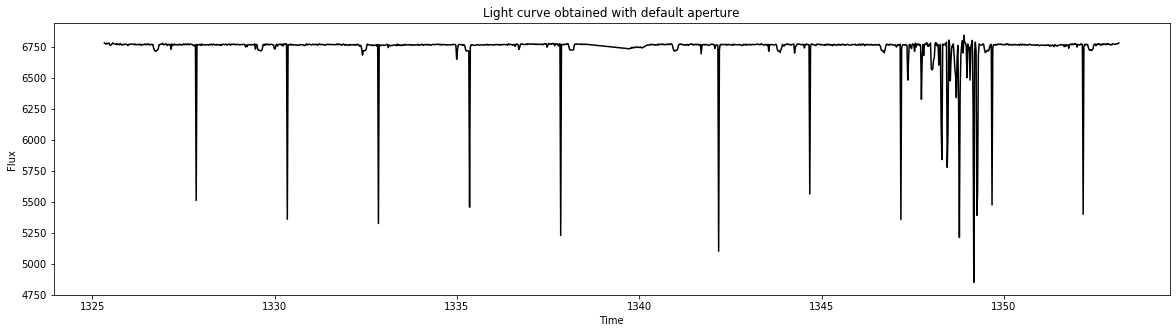

In [3]:
data_org = eleanor.TargetData(star, height=30, width=30, bkg_size=31, do_psf=True, do_pca=True)
plt.figure(figsize=(20,5))
default_flux=data_org.corr_flux
plt.plot(data_org.time, data_org.corr_flux, 'k')
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light curve obtained with default aperture')

Extract default aperture and supply as a custom aperture to obtain a new light curve

Text(0.5, 1.0, 'Light cuve obtained after giving default aperture as custom aperture')

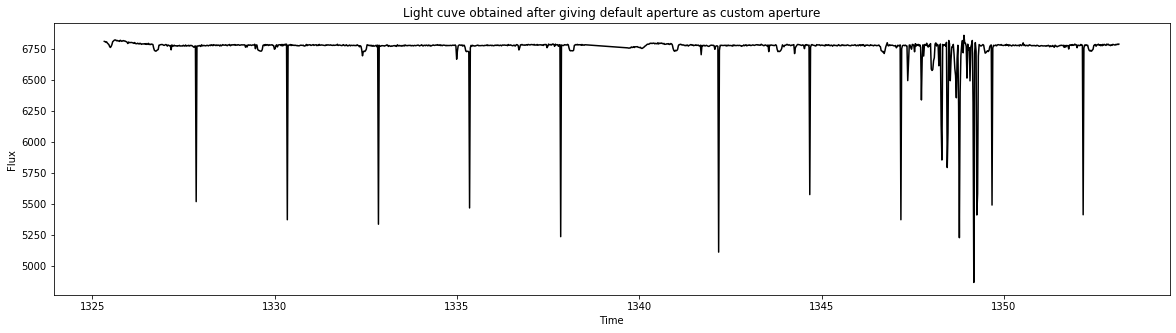

In [4]:
default_aperture=data_org.aperture
eleanor.TargetData.get_lightcurve(data_org,aperture=default_aperture)
custom_flux=data_org.corr_flux
plt.figure(figsize=(20,5))
plt.plot(data_org.time, data_org.corr_flux, 'k')
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light cuve obtained after giving default aperture as custom aperture')

Compare two flux obtained from default aperture and custom aperture (supplied default aperture)

Text(0.5, 1.0, 'Difference in flux between the custom aperture and the default aperture')

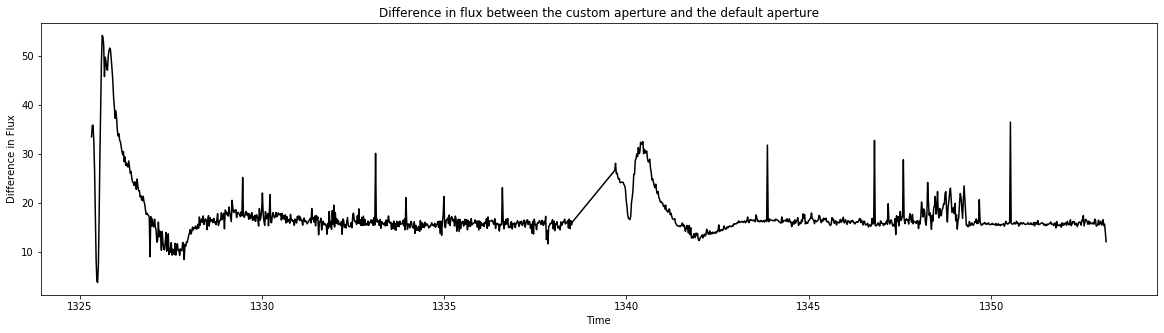

In [5]:
plt.figure(figsize=(20,5))
plt.plot(data_org.time, custom_flux-default_flux, 'k')
plt.ylabel('Difference in Flux')
plt.xlabel('Time')
plt.title('Difference in flux between the custom aperture and the default aperture')

The plot shows a difference in the flux in light curve obtained from the custom aperture and default aperture. Since we have given the custom aperture and default aperture as the same the package should provide the same light curve. We can again estimate the corrected flux as follows

In [6]:
#Re-estimating the corrected flux as written in eleanor manual
corr_flux = eleanor.TargetData.corrected_flux(data_org, flux=data_org.raw_flux)

Plotting the difference in flux between custom aperture and default aperture flux after re-estimating the corrected in custom aperture flux

Text(0.5, 1.0, '')

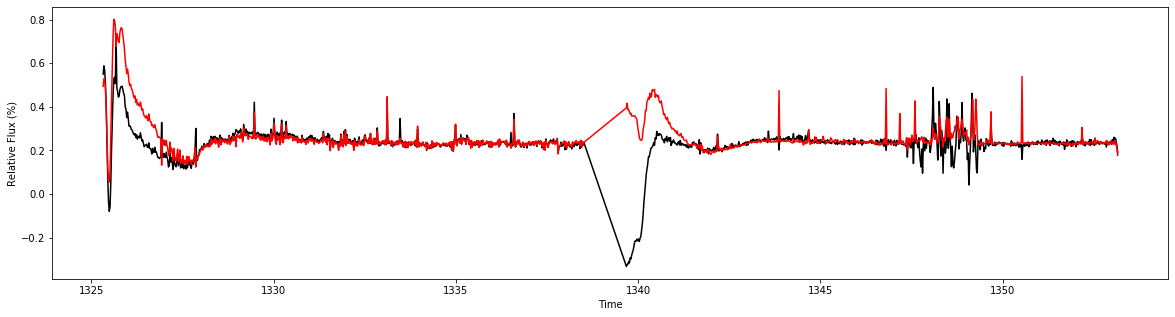

In [7]:
plt.figure(figsize=(20,5))
plt.plot(data_org.time, ((corr_flux-default_flux)/default_flux)*100, 'k')
plt.plot(data_org.time, ((custom_flux-default_flux)/default_flux)*100, 'r')
plt.ylabel('Relative Flux (%)')
plt.xlabel('Time')
plt.title('')

Even after re-estimation of the corrected flux. There is a difference in the flux between the custom and default apertures. The figure shows the relative flux difference between the two apertures. The re-estimated relative flux shown in red and relative flux without re-estimation in black.

### Example 2

In [12]:
def to_pandas(data=''):
    '''Elanor tpf is converted to pandas'''
    data_frame=pd.DataFrame()
    data_frame['time']=data.time.byteswap().newbyteorder()
    data_frame['raw_flux']=data.raw_flux.byteswap().newbyteorder()
    data_frame['corr_flux']=data.corr_flux.byteswap().newbyteorder()
    data_frame['pca_flux']=data.pca_flux.byteswap().newbyteorder()
    data_frame['psf_flux']=data.psf_flux.byteswap().newbyteorder()
    data_frame['quality']=data.quality.byteswap().newbyteorder()
    data_frame=data_frame.set_index('time',drop=False)
    return data_frame

def apply_flag(data='',start_time=None,end_time=None,extra_flag=True):
    #flagging bad data points
    time_flag=(data.time >start_time)&(data.time <end_time)
    quality_flag=data.quality==0    
    extra_flag = (data.corr_flux<(data.corr_flux.mean()+0.5*data.corr_flux.std())) & (data.corr_flux>(data.corr_flux.mean()-0.5*data.corr_flux.std()))
    flags=time_flag*quality_flag*extra_flag
    data=data.loc[flags]
    return data

star = eleanor.Source(tic=187134713,sector=12)
data_org = eleanor.TargetData(star, height=30, width=30, bkg_size=31, do_psf=True, do_pca=True)
df_org=to_pandas(data=data_org)

INFO: Found cached file /home/dinilbose/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0012-1-3-cal-0412-0052_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0012-1-3-cal-0412-0052_tess_v2_bkg.fits with expected size 79384320. [astroquery.query]
INFO: Found cached file /home/dinilbose/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0012-1-3-cal-0412-0052_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0012-1-3-cal-0412-0052_tess_v2_pc.fits with expected size 158880960. [astroquery.query]
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS head

Set DATE-BEG to '2019-05-21T11:08:22.639' from MJD-BEG'. [astropy.wcs.wcs]
/usr/local/lib/python3.6/dist-packages/eleanor/targetdata.py:295: UserWarning: We force our TPFs to have an odd height and width so we can properly center our apertures.
  warnings.warn('We force our TPFs to have an odd height and width so we can properly center our apertures.')
100%|██████████| 1289/1289 [00:06<00:00, 188.43it/s]


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


Text(0.5, 1.0, 'Difference in flux between the custom aperture and the default aperture')

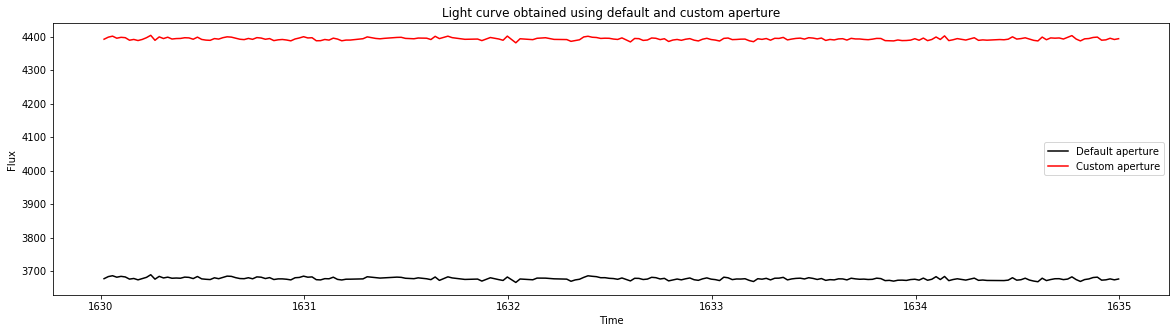

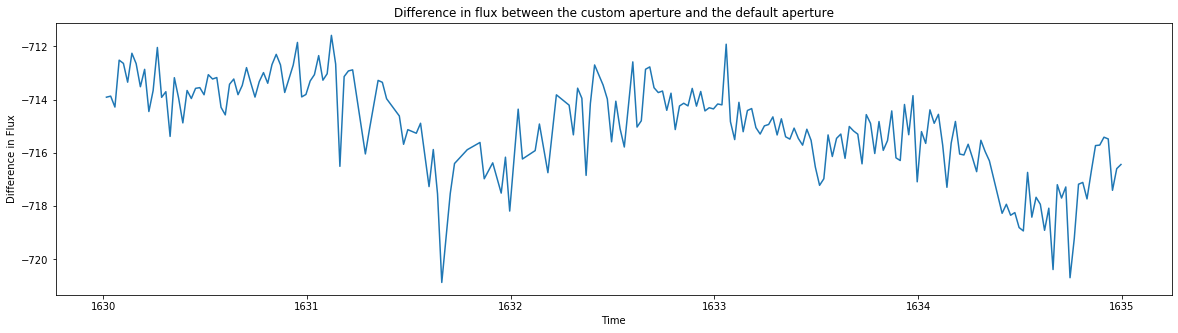

In [13]:
plt.figure(figsize=(20,5))
df_org=apply_flag(df_org,start_time=1630,end_time=1635)
plt.plot(df_org.time, df_org.corr_flux, 'k',label='Default aperture')
plt.ylabel('Flux')
plt.xlabel('Time')
# plt.title('Default Aperture')
data=data_org
old_aperture=data_org.aperture
eleanor.TargetData.custom_aperture(data, shape='circle', r=1,pos=[15,23])
eleanor.TargetData.get_lightcurve(data,aperture=old_aperture)
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)
df=to_pandas(data=data)
df=apply_flag(df,start_time=1630,end_time=1635)
plt.plot(df.time, df.corr_flux, 'r',label='Custom aperture')
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light curve obtained using default and custom aperture')
plt.legend()

# plt.title('Light curve obtained using default and custom aperture')

# plt.plot(df_org.time, df_org.corr_flux, 'k')
plt.figure(figsize=(20,5))
plt.plot(df_org.corr_flux-df.corr_flux)
plt.ylabel('Difference in Flux')
plt.xlabel('Time')
plt.title('Difference in flux between the custom aperture and the default aperture')

There should not be any difference in flux since the default aperture is given as the custom aperture but indeed we find a difference. What will be the reason for this? Do we miss something?